In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "Your_Path/train/"

In [3]:
CATEGORIES = ["Basket", "Coin", "Figure"] # change to your CATEGORIES

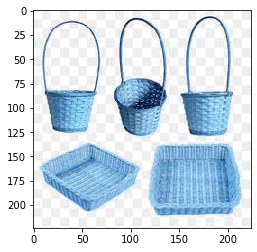

In [4]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)#convert to array/For grayscle change to cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)

In [5]:
print(img_array.shape)

(224, 224, 3)


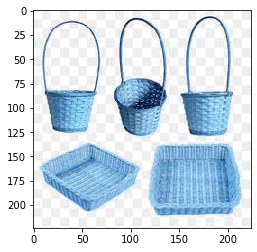

In [6]:
IMG_SIZE = 224 #Change to Desired Image_Size

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap=None)
plt.show()

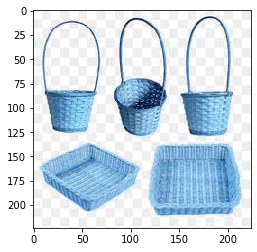

In [7]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap=None)
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification 

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)#convert to array//For grayscle change to cv2.IMREAD_GRAYSCALE
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 82.93it/s]

300


In [9]:
train_images = []
train_labels = []

for features,label in training_data:
    train_images.append(features)
    train_labels.append(label)

print(train_images[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [238 238 238]
   [238 238 238]
   [238 238 238]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [238 238 238]
   [238 238 238]
   [238 238 238]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [238 238 238]
   [238 238 238]
   [238 238 238]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [238 238 238]
   [238 238 238]
   [238 238 238]]

  [[250 250 250]
   [250 250 250]
   [250 250 250]
   ...
   [243 243 243]
   [243 243 243]
   [243 243 243]]

  [[237 237 237]
   [237 237 237]
   [237 237 237]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]]


In [11]:
import pickle

pickle_out = open("train_images.pickle","wb")
pickle.dump(train_images, pickle_out)
pickle_out.close()

pickle_out = open("train_labels.pickle","wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

In [10]:
test_images.shape

(300, 224, 224, 3)